## Plot Benchmark Data
This python notebook uses `matplotlib` and `pandas`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def hist(df, local, fs, **kwargs) :
    """Get slice from pandas.DataFrame and plot histogram
    
    Histogram is filled with time / size * 10 ** 6 so that the
    filled variable has units of s / MB. The histogram generated
    is given a label corresponding to the inputs local and fs.
    
    Parameters
    ----------
    df : pandas.DataFrame
        dataframe of data read in during runs
    local : bool
        copied to local scratch run or not?
    fs : str
        'hdfs' or 'zfs' filesystem
    kwargs : dict
        passed on to plt.hist
    """
    sl = df[(df['local'] == local) & (df['filesystem'] == fs)]
    local_str = 'remote'
    if local :
        local_str = 'local'
    plt.hist(sl['time']/sl['size']*10**6, label = f'{fs} {local_str}', **kwargs)

In [2]:
df = pd.read_json('all-branches-runs.json',orient='records')

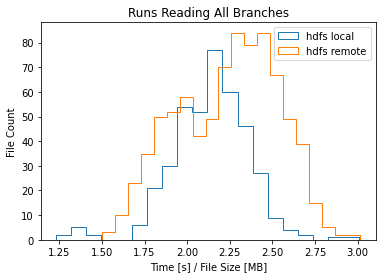

In [3]:
hist(df, True , 'hdfs', bins=20, histtype='step')
hist(df, False, 'hdfs', bins=20, histtype='step')
plt.xlabel('Time [s] / File Size [MB]')
plt.ylabel('File Count')
plt.title('Runs Reading All Branches')
plt.legend()